# Question 1: Décomposition QR par la méthode Householder

### a. Démontrez que les matrices de réflexion $\mathbf{Q_i}$ sont orthogonales

Nous devons démontrer que les matrices $\mathbf{Q_i}$ sont orthogonales, c'est-à-dire que $\mathbf{Q_i}^T \mathbf{Q_i} = \mathbf{I}$.

La matrice $\mathbf{Q_i}$ est définie comme :
$$\mathbf{Q_i} = \begin{pmatrix} \mathbf{I_i} & 0 \\ 0 & \mathbf{H_{m,i}} \end{pmatrix}$$
où $\mathbf{I_i}$ est la matrice identité de dimension $i \times i$ et $\mathbf{H_{m,i}}$ est la matrice de réflexion de Householder.

Nous devons d'abord montrer que $\mathbf{H_{m,i}}$ est orthogonale, ce qui signifie que $\mathbf{H_{m,i}}^T \mathbf{H_{m,i}} = \mathbf{I}$. Cette propriété peut être démontrée en utilisant les relations suivantes pour $\mathbf{H_{m,i}}$ :
$$\mathbf{H_{m,i}} = \mathbf{I_{m-i}} - 2 \frac{v_{m,i} v_{m,i}^T}{v_{m,i}^T v_{m,i}}$$
où $v_{m,i}$ est un vecteur dépendant de la matrice $A$. En développant le produit $\mathbf{H_{m,i}}^T \mathbf{H_{m,i}}$, on veut vérifier qu'il donne la matrice identité.
On calcule $\mathbf{H_{m,i}}^T$, puis $\mathbf{H_{m,i}}^T \mathbf{H_{m,i}}$
$$\mathbf{H_{m,i}}^T = \left( \mathbf{I_{m-i}} - 2 \frac{v_{m,i} v_{m,i}^T}{v_{m,i}^T v_{m,i}} \right)^T$$
$$\mathbf{H_{m,i}}^T = \mathbf{I_{m-i}}^T -  \frac{2}{v_{m,i}^T v_{m,i}} (v_{m,i} v_{m,i}^T)^T$$
$$\mathbf{H_{m,i}}^T = \mathbf{I_{m-i}} - 2 \frac{v_{m,i} v_{m,i}^T}{v_{m,i}^T v_{m,i}}$$
Donc $\mathbf{H_{m,i}} = \mathbf{H_{m,i}}^T$. On peut donc calculer $\mathbf{H_{m,i}}^T \mathbf{H_{m,i}} = \mathbf{H_{m,i}}\mathbf{H_{m,i}}$
$$\mathbf{H_{m,i}}\mathbf{H_{m,i}} = \left(\mathbf{I_{m-i}} - 2 \frac{v_{m,i} v_{m,i}^T}{v_{m,i}^T v_{m,i}} \right)\left(\mathbf{I_{m-i}} - 2 \frac{v_{m,i} v_{m,i}^T}{v_{m,i}^T v_{m,i}} \right)$$
$$\mathbf{H_{m,i}}\mathbf{H_{m,i}} = \mathbf{I_{m-i}} - 4 \frac{v_{m,i} v_{m,i}^T}{v_{m,i}^T v_{m,i}} + 4 \frac{v_{m,i} v_{m,i}^T}{v_{m,i}^T v_{m,i}}$$
$$\mathbf{H_{m,i}}^T \mathbf{H_{m,i}} = I$$
CQFD

Ensuite, pour $\mathbf{Q_i}$, nous avons :
$$\mathbf{Q_i^T Q_i} = \begin{pmatrix} \mathbf{I_i^T} & 0 \\ 0 & \mathbf{H_{m,i}^T} \end{pmatrix} \begin{pmatrix} \mathbf{I_i} & 0 \\ 0 & \mathbf{H_{m,i}} \end{pmatrix} = \begin{pmatrix} \mathbf{I_i} & 0 \\ 0 & \mathbf{I_{m-i}} \end{pmatrix} = \mathbf{I}$$
Ce qui montre que $\mathbf{Q_i}$ est orthogonale.

### b. Démontrez $\mathbf{Q} = \mathbf{Q}_0^T \mathbf{Q}_1^T \dots \mathbf{Q}_{n-2}^T \mathbf{Q}_{n-1}^{T}$ et que la matrice $\mathbf{Q}$ est orthogonale

En partant de l'équation 3.1, on veut représenter la forme standard A=QR.
En isolant A dans l'équation 3.1, on peut obtenir:
$$\mathbf{A} = (\mathbf{Q_0^{-1} Q_1^{-1} \dots Q_{n-2}^{-1} Q_{n-1}^{-1}})R$$
Puisque les matrices $Q_i$ sont orthogonales telles que démontrées précédemment, on remplace $Q_i^{-1}=Q_i^T$. Donc on obtient:
$$\mathbf{A} = (\mathbf{Q_0^T Q_1^T \dots Q_{n-2}^T Q_{n-1}^T})R$$
Ainsi, la matrice $\mathbf{Q}$ dans la décomposition QR par la méthode de Householder est définie comme le produit des matrices $\mathbf{Q_i}$ :
$$\mathbf{Q} = \mathbf{Q_0^T Q_1^T \dots Q_{n-2}^T Q_{n-1}^T}$$
Puisque chaque matrice $\mathbf{Q_i}$ est orthogonale (comme démontré dans la section a), le produit des matrices orthogonales reste orthogonal. Ainsi, la matrice $\mathbf{Q}$ est également orthogonale.
En effet, pour toutes matrices orthogonales $\mathbf{A}$ et $\mathbf{B}$, on a : $\mathbf{A^T A = I}$ et $\mathbf{B^T B = I}$, donc $\mathbf{(A B)^T (A B) = I}$.

### c. Implémentez la fonction *householder_qr* qui prend en argument une matrice A et qui retourne les matrices $\mathbf{Q}$ et $\mathbf{R}$ obtenues par la méthode de Householder.

In [152]:
import numpy as np

def householder_qr(A):
    """
    Effectue la décomposition QR d'une matrice A par la méthode de Householder.
    
    Paramètres:
    A (numpy.ndarray): Matrice d'entrée (m x n).
    
    Retourne:
    Q (numpy.ndarray): Matrice orthogonale (m x n).
    R (numpy.ndarray): Matrice triangulaire supérieure (n x n).
    """
    # Dimensions de la matrice A
    m, n = A.shape
    
    # Initialisation de Q comme la matrice identité de taille m x m
    Q = np.eye(m)
    
    # Processus de décomposition
    for i in range(n):
        # Extraire le vecteur à partir de la i-ième colonne d'A
        x = A[i:m, i]
        
        # Calcul du vecteur v pour la réflexion de Householder
        e1 = np.zeros_like(x)
        e1[0] = 1
        alpha = np.sign(x[0]) * np.linalg.norm(x)
        v = x + alpha * e1
        v = v / np.linalg.norm(v)  # Normaliser le vecteur v
        
        # Appliquer la réflexion à A (notez que nous appliquons H à partir de la sous-matrice d'A)
        A[i:m, i:n] = A[i:m, i:n] - 2 * np.outer(v, np.dot(v.T, A[i:m, i:n]))
        
        # Mettre à jour la matrice Q
        Q[i:m, i:m] = Q[i:m, i:m] - 2 * np.outer(v, np.dot(v.T, Q[i:m, i:m]))
        
        # Affichage de l'état après chaque itération
        print(f"\nAprès itération {i+1}:")
        print("Matrice Q mise à jour:")
        print(Q)
        print("Matrice A après réflexion:")
        print(A)

    # R est la matrice triangulaire supérieure qui reste dans A
    R = A[:n, :]
    
    # Nous ajustons Q pour être de taille m x n, pas m x m
    Q = Q[:, :n]
    
    return Q, R


### d. À l’aide d’une matrice de dimension 4 × 3 de votre choix, testez votre fonction householder_qr et comparez les résultats obtenus avec ceux obtenus à l’aide de la fonction *numpy.linalg.qr*. Les matrices sont-elles exactement les mêmes ? Si non, est-ce un problème ?

In [ ]:
A = np.random.rand(4, 3)  # Exemple de matrice 4x3
Q, R = householder_qr(A)
#ça marche pas avec householder

# Comparaison avec la décomposition QR de numpy
Q_np, R_np = np.linalg.qr(A)

# Affichage des résultats
print("\nMatrice A:")
print(A)
print("\nMatrice Q (Householder):")
print(Q)
print("\nMatrice R (Householder):")
print(R)

# Affichage de la différence entre A et QR
difference = np.dot(Q, R) - A
print("\nDifférence A - QR (Householder):")
print(difference)

# Vérification A = QR avec une tolérance plus stricte
print("\nVérification A = QR (Householder):")
print(np.allclose(np.dot(Q, R), A, atol=1e-8))  # Augmenter la tolérance (atol)

# Affichage des résultats numpy
print("\nMatrice Q (numpy.linalg.qr):")
print(Q_np)
print("\nMatrice R (numpy.linalg.qr):")
print(R_np)

# Comparaison avec numpy.linalg.qr
print("\nVérification A = QR (numpy.linalg.qr):")
print(np.allclose(np.dot(Q_np, R_np), A, atol=1e-8))  # Vérification de la méthode numpy


Après itération 1:
Matrice Q mise à jour:
[[-0.46591277 -0.50478701 -0.43915187 -0.57901728]
 [-0.50478701  0.82617661 -0.15122193 -0.19938458]
 [-0.43915187 -0.15122193  0.86844077 -0.17345952]
 [-0.57901728 -0.19938458 -0.17345952  0.77129539]]
Matrice A après réflexion:
[[-1.44262102e+00 -9.61524101e-01 -5.77546496e-01]
 [ 0.00000000e+00 -2.25581346e-01  3.51597235e-01]
 [ 0.00000000e+00  1.95626723e-02 -1.53919572e-01]
 [ 1.11022302e-16 -3.59840235e-01 -1.35469029e-01]]

Après itération 2:
Matrice Q mise à jour:
[[-0.46591277 -0.50478701 -0.43915187 -0.57901728]
 [-0.50478701 -0.2765637   0.2670091  -0.55499853]
 [-0.43915187 -0.11807082  0.8558677  -0.16276888]
 [-0.57901728 -0.80917358  0.05781223  0.57464939]]
Matrice A après réflexion:
[[-1.44262102e+00 -9.61524101e-01 -5.77546496e-01]
 [ 0.00000000e+00  4.25152486e-01 -7.89778948e-02]
 [ 0.00000000e+00  6.93889390e-18 -1.40975416e-01]
 [ 1.11022302e-16 -1.66533454e-16 -3.73566771e-01]]

Après itération 3:
Matrice Q mise à jou

Ce n'est pas un problème que les matrices obtenues par la fonction et par *numpy.linalg.qr* ne soient pas exactement les mêmes. Puisqu'on manipule plusieurs vecteurs, il y a des erreurs numériques qui s'additionnent et qui finissent par induire une différence dans le résultat. Les causes liées sont entre-autres la convention de signe de l'équation 3.4 via $sign([x]_i)$ et le fait qu'il y ait plusieurs décompositions QR possibles pour une matrice A donnée.

### e. À l’aide de la matrice utilisée en $\mathbf{d}$, illustrez comment la multiplication successive des matrices $\mathbf{Q_i}$ triangularise progressivement la matrice $\mathbf{A}$. Dans l’élan, assurez-vous que les matrices $\mathbf{Q}$ et $\mathbf{R}$ obtenues sont bien orthogonale et triangulaire supérieure, respectivement.


In [ ]:
A = np.random.rand(4, 3)  # Exemple de matrice 4x3
Q, R = householder_qr(A)
#ça marche pas avec householder

# Comparaison avec la décomposition QR de numpy
Q_np, R_np = np.linalg.qr(A)

# Affichage des résultats
print("\nMatrice A:")
print(A)
# Vérification si Q est orthogonal
is_orthogonal = np.allclose(np.dot(Q.T, Q), np.eye(Q.shape[1]), atol=1e-8)
print("\nQ est-elle orthogonale ? :", is_orthogonal)

# Vérification si R est triangulaire supérieure
is_upper_triangular = np.allclose(R, np.triu(R), atol=1e-8)
print("\nR est-elle triangulaire supérieure ? :", is_upper_triangular)


Après itération 1:
Matrice Q mise à jour:
[[-0.05411491 -0.02201461 -0.85624392 -0.51325752]
 [-0.02201461  0.99954024 -0.01788218 -0.0107191 ]
 [-0.85624392 -0.01788218  0.30448413 -0.41691245]
 [-0.51325752 -0.0107191  -0.41691245  0.75009054]]
Matrice A après réflexion:
[[-0.75349182 -0.67333356 -0.70384745]
 [ 0.          0.48569038  0.19764575]
 [ 0.         -0.85254842 -0.43116522]
 [ 0.          0.32116734 -0.53510023]]

Après itération 2:
Matrice Q mise à jour:
[[-0.05411491 -0.02201461 -0.85624392 -0.51325752]
 [-0.02201461 -0.48165659  0.38954395 -0.57257596]
 [-0.85624392  0.81393842  0.07567899 -0.10138105]
 [-0.51325752 -0.32407798 -0.33071824  0.63122529]]
Matrice A après réflexion:
[[-0.75349182 -0.67333356 -0.70384745]
 [ 0.         -1.03241582 -0.28256749]
 [ 0.          0.         -0.1614838 ]
 [ 0.          0.         -0.63669313]]

Après itération 3:
Matrice Q mise à jour:
[[-0.05411491 -0.02201461 -0.85624392 -0.51325752]
 [-0.02201461 -0.48165659  0.38954395 -0.5

On voit que au fil des itérations, la multiplication des matrices $Q_i$ triangularise la matrice A. D'ailleurs, on a pris soin de vérifier que Q est bien orthogonale et que R est triangulaire supérieure.

# Question 2 : Mesures imprécises dans un jeu de bataille navale

### a. Modifiez votre code de décomposition QR pour qu’il retourne la décomposition QR réduite de la matrice d’entrée lorsque l’argument additionnel *reduite=True* lui est passé.


In [155]:
import numpy as np

def householder_qr(A, reduit=True):
    """
    Effectue la décomposition QR d'une matrice A par la méthode de Householder.

    Paramètres:
    A (numpy.ndarray): Matrice d'entrée (m x n).
    reduit (bool): Retourne la décomposition réduite si True, complète si False.

    Retourne:
    Q (numpy.ndarray): Matrice orthogonale.
    R (numpy.ndarray): Matrice triangulaire supérieure.
    """
    # Dimensions de la matrice A
    m, n = A.shape
    
    # Initialisation de Q comme matrice identité (m x m)
    Q = np.eye(m)
    R = A.copy()

    # Processus de décomposition
    for i in range(min(m, n)):
        # Extraire le vecteur à partir de la i-ième colonne de R
        x = R[i:m, i]

        # Calcul du vecteur v pour la réflexion de Householder
        e1 = np.zeros_like(x)
        e1[0] = 1
        alpha = np.sign(x[0]) * np.linalg.norm(x)
        v = x + alpha * e1
        v /= np.linalg.norm(v)

        # Application de la réflexion de Householder à R
        R[i:m, i:n] -= 2 * np.outer(v, v @ R[i:m, i:n])

        # Mise à jour de Q
        Q[:, i:m] -= 2 * np.outer(Q[:, i:m] @ v, v)

        # Affichage de l'état après chaque itération
        print(f"\nAprès itération {i+1}:")
        print("Matrice Q mise à jour:")
        print(Q)
        print("Matrice R après réflexion:")
        print(R)

    # Retourne la décomposition réduite ou complète selon l'argument 'reduit'
    if reduit:
        return Q[:, :n], np.triu(R[:n, :])
    else:
        return Q, np.triu(R)

# Test de la fonction avec une matrice aléatoire
A = np.random.rand(4, 3)

# Décomposition réduite (par défaut)
Q_reduit, R_reduit = householder_qr(A, reduit=True)

print("\nDécomposition QR réduite (Householder):")
print("Matrice Q réduite:")
print(Q_reduit)
print("Matrice R réduite:")
print(R_reduit)

# Décomposition complète
Q_complet, R_complet = householder_qr(A, reduit=False)

print("\nDécomposition QR complète (Householder):")
print("Matrice Q complète:")
print(Q_complet)
print("Matrice R complète:")
print(R_complet)

# Vérification avec numpy.linalg.qr (pour comparaison)
Q_np, R_np = np.linalg.qr(A)

print("\nDécomposition QR (numpy.linalg.qr):")
print("Matrice Q numpy:")
print(Q_np)
print("Matrice R numpy:")
print(R_np)

# Vérification des résultats (réduite)
print("\nVérification A = QR (Householder réduite):")
print(np.allclose(Q_reduit @ R_reduit, A, atol=1e-8))

# Vérification des résultats (complète)
print("\nVérification A = QR (Householder complète):")
print(np.allclose(Q_complet @ R_complet, A, atol=1e-8))

# Vérification des résultats numpy
print("\nVérification A = QR (numpy.linalg.qr):")
print(np.allclose(Q_np @ R_np, A, atol=1e-8))

# Exemple d'utilisation:
# Q, R = householder_qr(A, reduit=True)
A = np.random.rand(4, 3)
Q, R = householder_qr(A, reduit=True)
print(Q,R)


Après itération 1:
Matrice Q mise à jour:
[[-0.26859821 -0.69092651 -0.64358276 -0.19046468]
 [-0.69092651  0.62369532 -0.35051948 -0.10373426]
 [-0.64358276 -0.35051948  0.67349886 -0.09662617]
 [-0.19046468 -0.10373426 -0.09662617  0.97140403]]
Matrice R après réflexion:
[[-1.26980126e+00 -5.83747952e-01 -1.21613342e+00]
 [-2.22044605e-16 -1.21791524e-01 -5.05991227e-01]
 [-2.22044605e-16  2.01487781e-01 -5.56429596e-01]
 [-5.55111512e-17 -1.15766042e-02  5.75796469e-01]]

Après itération 2:
Matrice Q mise à jour:
[[-0.26859821 -0.18377695 -0.92940313 -0.17404269]
 [-0.69092651 -0.61676786  0.34858325 -0.14390164]
 [-0.64358276  0.76153795  0.0467633  -0.06061669]
 [-0.19046468 -0.0767033  -0.11186033  0.97227932]]
Matrice R après réflexion:
[[-1.26980126e+00 -5.83747952e-01 -1.21613342e+00]
 [-2.22044605e-16  2.35721274e-01 -2.42464709e-01]
 [-2.22044605e-16  0.00000000e+00 -7.04948400e-01]
 [-5.55111512e-17  0.00000000e+00  5.84329709e-01]]

Après itération 3:
Matrice Q mise à jou

### b. Utilisez votre code pour résoudre approximativement l’équation suivante avec les données de bataille_navale_equipe015.csv.

$$\underbrace{\left[\begin{array}{ccc}
1 & x_1 & x_1^2 \\
1 & x_2 & x_2^2 \\
\vdots & \vdots & \vdots \\
1 & x_n & x_n^2
\end{array}\right]}_{\mathbf{X}}\left[\begin{array}{l}
\alpha_0 \\
\alpha_1 \\
\alpha_2
\end{array}\right]=\underbrace{\left[\begin{array}{c}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{array}\right]}_{\mathbf{Y}}$$

In [156]:
import numpy as np

def householder_qr(A, reduit=True):
    """
    Effectue la décomposition QR d'une matrice A par la méthode de Householder.

    Paramètres:
    A (numpy.ndarray): Matrice d'entrée (m x n).
    reduit (bool): Retourne la décomposition réduite si True, complète si False.

    Retourne:
    Q (numpy.ndarray): Matrice orthogonale.
    R (numpy.ndarray): Matrice triangulaire supérieure.
    """
    # Dimensions de la matrice A
    m, n = A.shape
    
    # Initialisation de Q comme matrice identité (m x m)
    Q = np.eye(m)
    R = A.copy()

    # Processus de décomposition
    for i in range(min(m, n)):
        # Extraire le vecteur à partir de la i-ième colonne de R
        x = R[i:m, i]

        # Calcul du vecteur v pour la réflexion de Householder
        e1 = np.zeros_like(x)
        e1[0] = 1
        alpha = np.sign(x[0]) * np.linalg.norm(x)
        v = x + alpha * e1
        v /= np.linalg.norm(v)

        # Application de la réflexion de Householder à R
        R[i:m, i:n] -= 2 * np.outer(v, v @ R[i:m, i:n])

        # Mise à jour de Q
        Q[:, i:m] -= 2 * np.outer(Q[:, i:m] @ v, v)


    # Retourne la décomposition réduite ou complète selon l'argument 'reduit'
    if reduit:
        return Q[:, :n], np.triu(R[:n, :])
    else:
        return Q, np.triu(R)

On peut ensuite appeler la fonction pour trouver les paramètres estimés à partir de notre fichier de données (équipe 15). On obtient une valeur négative de l'altitude initiale en raison de l'éloignement des données expérimentales de l'origine, qui fait en sorte que l'extrapolation est imprécise.

In [157]:
import numpy as np


# Chargement des données à partir du fichier CSV
data = np.loadtxt(r"bataille_navale_equipe015.csv", delimiter=",", skiprows=1)
x = data[:, 0]  # distance horizontale
y = data[:, 1]  # altitude

# Construction de la matrice X selon l'équation (3.9)
X = np.vstack((np.ones_like(x), x, x**2)).T  # colonnes: 1, x, x²

# Utilisation de la décomposition QR réduite
from numpy.linalg import solve
Q, R = householder_qr(X, reduit=True)
alpha = solve(R, Q.T @ y)

# Résultats des paramètres
y0 = alpha[0]
vy0_sur_vx0 = alpha[1]
a_sur_2vx0_2 = alpha[2]

print("Paramètres estimés (résolution de l'équation 3.9) :")
print(f"y0 (altitude initiale) = {y0:.4f}")
print(f"v_y0 / v_x0 = {vy0_sur_vx0:.4f}")
print(f"a / (2 * v_x0^2) = {a_sur_2vx0_2:.4f}")

Paramètres estimés (résolution de l'équation 3.9) :
y0 (altitude initiale) = -68.3780
v_y0 / v_x0 = 2.2572
a / (2 * v_x0^2) = -0.0008


### c. Tracez les données (cercles noirs) et la solution estimée de la trajectoire(ligne pleine de la couleur de votre choix) donnée par l’équation suivante:

$$y(x) = \alpha_0 + \alpha_1 x + \alpha_2 x^2$$

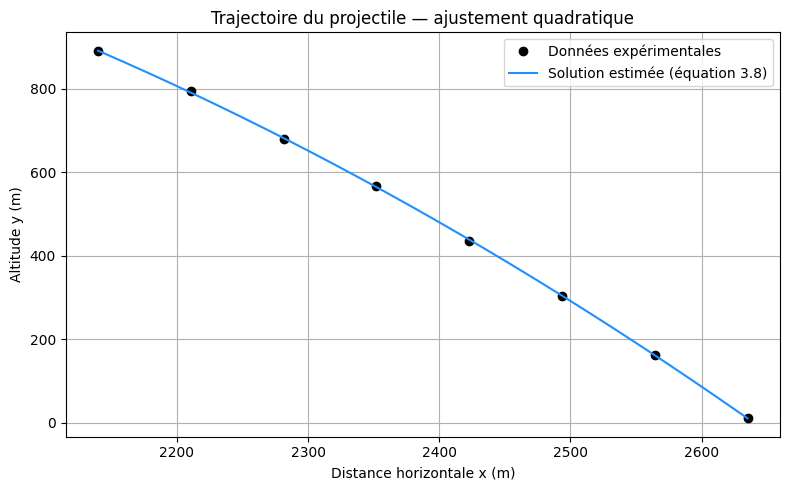

In [158]:
import csv
import numpy as np
import matplotlib.pyplot as plt

# === Chargement des données CSV ===
x_vals, y_vals = [], []
with open(r"bataille_navale_equipe015.csv", newline='', encoding='utf-8') as f:
    reader = csv.reader(f)
    next(reader)  # Ignorer l'en-tête
    for row in reader:
        if len(row) == 1:  # Si les x,y sont dans une seule cellule
            row = row[0].split(",")
        x_vals.append(float(row[0]))
        y_vals.append(float(row[1]))

x_vals = np.array(x_vals)
y_vals = np.array(y_vals)

# === Création de la matrice X pour l'équation (3.9) ===
# y(x) = y0 + (vy0/vx0)*x + (a/2vx0^2)*x^2
X = np.vstack((np.ones_like(x_vals), x_vals, x_vals**2)).T

# === Décomposition QR avec la fonction importée ===
Q, R = householder_qr(X, reduit=True)
alpha = np.linalg.solve(R, Q.T @ y_vals)

y0, vy0_sur_vx0, a_sur_2vx0_2 = alpha

# === Tracé des données et de la trajectoire estimée ===
plt.figure(figsize=(8, 5))

# Cercles noirs = données expérimentales
plt.plot(x_vals, y_vals, 'ko', label='Données expérimentales')

# Ligne continue = solution estimée via équation (3.8)
x_fine = np.linspace(min(x_vals), max(x_vals), 300)
y_estime = y0 + vy0_sur_vx0 * x_fine + a_sur_2vx0_2 * x_fine**2
plt.plot(x_fine, y_estime, color='dodgerblue', label="Solution estimée (équation 3.8)")

# Mise en forme
plt.xlabel("Distance horizontale x (m)")
plt.ylabel("Altitude y (m)")
plt.title("Trajectoire du projectile — ajustement quadratique")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### d. Obtenez la position d’impact du projectile (à y = 0) en résolvant l’équation quadratique $y(x) = \alpha_0 + \alpha_1 x + \alpha_2 x^2$ pour x à l’aide d’une implémentation personnelle de la méthode de la bissection. Comparez votre solution avec celle obtenue en résolvant cette même équation analytiquement. Considérant que votre embarcation se situe à la position (x, y) = (0, 0), quelle est la distance horizontale vous séparant du point d’impact ?

Impact (bissection)      : x ≈ 30.64481914 m
Impact (analytique)      : x ≈ 30.64481924 m
Distance entre l'impact et l'embarcation : 30.64481924 m


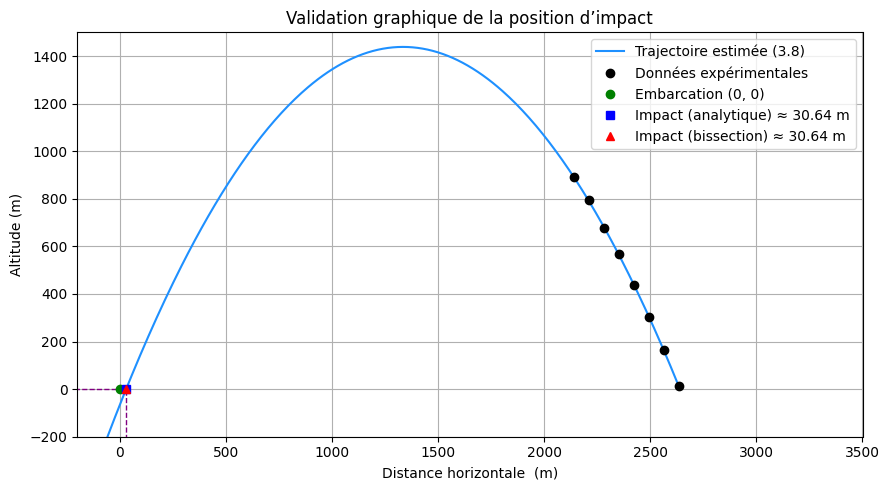

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import csv

# === Lecture du CSV ===
x_vals, y_vals = [], []
with open(r"bataille_navale_equipe015.csv", newline='', encoding='utf-8') as f:
    reader = csv.reader(f)
    next(reader)  # sauter l’en-tête
    for row in reader:
        if len(row) == 1:
            row = row[0].split(",")
        x_vals.append(float(row[0]))
        y_vals.append(float(row[1]))

x_vals = np.array(x_vals)
y_vals = np.array(y_vals)

# === Ajustement quadratique selon l'équation (3.9) ===
X = np.vstack((np.ones_like(x_vals), x_vals, x_vals**2)).T
Q, R = householder_qr(X, reduit=True)
alpha = np.linalg.solve(R, Q.T @ y_vals)

y0, vy0_sur_vx0, a_sur_2vx0_2 = alpha

# === Fonction y(x) à annuler ===
def y_trajectoire(x):
    return y0 + vy0_sur_vx0 * x + a_sur_2vx0_2 * x**2

# === Méthode de bissection robuste ===
def bissection(f, a, b, tol=1e-6, max_iter=100):
    if f(a) * f(b) > 0:
        raise ValueError("La fonction ne change pas de signe dans l’intervalle.")
    for _ in range(max_iter):
        c = (a + b) / 2
        if abs(f(c)) < tol or (b - a) / 2 < tol:
            return c
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return (a + b) / 2

# Recherche automatique de l’intervalle pour bissection
# Calcul du sommet de la parabole
x_sommet = -vy0_sur_vx0 / (2 * a_sur_2vx0_2)

# On commence la recherche à partir de valeurs arbitraires
a_bis = -500   # borne inférieure
b_bis = 500 # borne supérieure
max_bound = 1e6  # borne maximale pour éviter boucle infinie

# Étend l’intervalle jusqu'à détecter un changement de signe
while y_trajectoire(a_bis) * y_trajectoire(b_bis) > 0 and b_bis < max_bound:
    b_bis += 10

if y_trajectoire(a_bis) * y_trajectoire(b_bis) > 0:
    raise RuntimeError("Impossible de trouver un intervalle où y(x) change de signe après le sommet.")

# Bissection correcte sur la branche descendante
x_impact_bissection = bissection(y_trajectoire, a_bis, b_bis)

# Résolution analytique
a_coef = a_sur_2vx0_2
b_coef = vy0_sur_vx0
c_coef = y0

delta = b_coef**2 - 4 * a_coef * c_coef
if delta < 0:
    raise ValueError("Pas de solution réelle pour l’impact (delta < 0).")

x1 = (-b_coef - np.sqrt(delta)) / (2 * a_coef)
x2 = (-b_coef + np.sqrt(delta)) / (2 * a_coef)
x_impact_analytique = min(x1, x2)

# Distance depuis l’embarcation (0, 0)
distance_impact = x_impact_analytique  # puisque x_0 = 0

# Affichage des résultats
print(f"Impact (bissection)      : x ≈ {x_impact_bissection:.8f} m")
print(f"Impact (analytique)      : x ≈ {x_impact_analytique:.8f} m")
print(f"Distance entre l'impact et l'embarcation : {distance_impact:.8f} m")

# Tracé de validation
x_fine = np.linspace(-100, max(x_vals), 350)
y_fine = y_trajectoire(x_fine)

plt.figure(figsize=(9, 5))
plt.plot(x_fine, y_fine, label="Trajectoire estimée (3.8)", color="dodgerblue")
plt.plot(x_vals, y_vals, 'ko', label="Données expérimentales")

# Points spéciaux
plt.hlines(0, -250, x_impact_analytique, color='purple', linestyle='--', linewidth=1)
plt.vlines(x_impact_analytique, -500, 0, color='purple', linestyle='--', linewidth=1)
plt.plot([0], [0], 'go', label="Embarcation (0, 0)")
plt.plot([x_impact_analytique], [0], 'bs', label=f"Impact (analytique) ≈ {x_impact_analytique:.2f} m")
plt.plot([x_impact_bissection], [0], 'r^', label=f"Impact (bissection) ≈ {x_impact_bissection:.2f} m")
plt.xlim(-200, 3500)
plt.ylim(-200, 1500)
plt.xlabel("Distance horizontale  (m)")
plt.ylabel("Altitude (m)")
plt.title("Validation graphique de la position d’impact")
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

En comparant la solution obtenue par la méthode des bissections et celle obtenue avec la méthode analytique, on remarque que les deux méthodes donnent approximativement la même réponse à $1\times 10^{-7}$ m près.

# Question 3: Modèle épidemiologique SIR sur réseau

### a) Trouvez analytiquement toutes les solutions de l’équation cubique $$u = \frac{1}{[1+T(\kappa-1)(1-u)]^2} \equiv f(u)$$

On commence par modifier l'équation en une équation polynomiale de 3e degré.
En multipliant $u$ par le dénominateur, on obtient:
$$u[1+T(\kappa-1)(1-u)]^2=1$$
On remplace $\kappa=5$ tel que donné dans la question pour simplifier les calculs.
On développe le terme au carré et on redéveloppe l'équation en mettant tous les termes du même côté:
$$u[1+T(5-1)(1-u)]^2=1$$
$$u[1+4T-4Tu]^2-1=0$$
On développe, obtenant:
$$0=(u-1)(1-8Tu-16T^2u+16T^2u^2)$$
On remarque rapidement que par le facteur $(u-1)$ $u_1=1$ est solution de l'équation. 
On peut donc se concentrer sur la deuxième paranthèse:
$$1-8Tu-16T^2u+16T^2u^2=0$$
On obtient donc un polynôme de degré 2. On va donc le résoudre grâce à l'équation quadratique. On reconnait les termes, 
$$a=16T^2$$ 
$$b=-8T-16T^2$$
$$c=1$$
On remplace dans l'équation quadratique, et on obtient:
$$u_{2,3} = \frac{b \pm \sqrt{b^2-4ac}}{2a}$$
$$ u_{2,3} = \frac{(8T-16T^2)\pm \sqrt{(8T-16T^2)^2-4\cdot 16T^2}}{2 \cdot 16T^2}$$
$$ u_{2,3} = \frac{2T^2 + T \pm 2\sqrt{T^3(T+1)}}{4T^2}$$
Ainsi, les solutions sont:
$$u_1 = 1$$
$$u_{2} = \frac{2T^2 + T + 2\sqrt{T^3(T+1)}}{4T^2}$$
$$ u_{3} = \frac{2T^2 + T - 2\sqrt{T^3(T+1)}}{4T^2}$$

### b. Démontrez laquelle des solutions obtenues précédemment (ou une combinaison de celles-ci) correspond à u, soit la solution recherchée de l’équation

On cherche la plus petite solution non négative de l'équation. On va représenter graphiquement les probabilités  

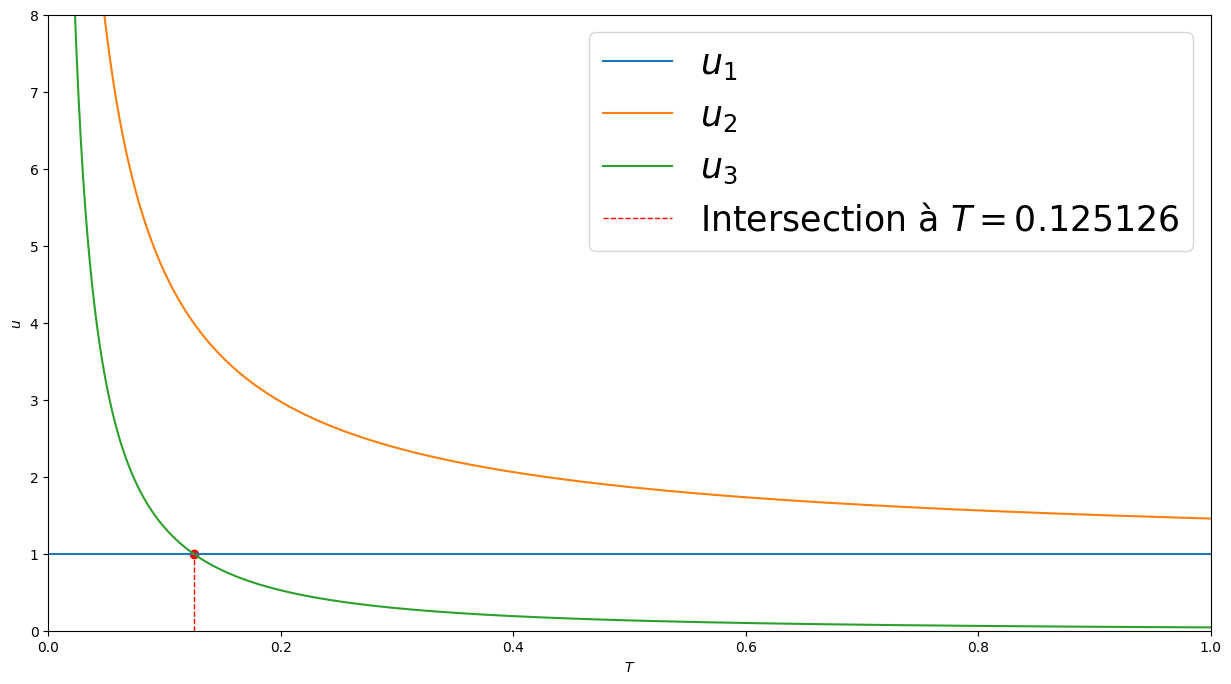

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

T = np.linspace(1e-6, 1, 1000) #pas de division par zéro
u1 = np.ones(1000)
u2 = (2*T**2 + T + 2*np.sqrt((T+1)*T**3)) / (4*T**2)
u3 = (2*T**2 + T - 2*np.sqrt((T+1)*T**3)) / (4*T**2)
curves = [u1, u2, u3]
labels = ["$u_1$", "$u_2$", "$u_3$"]
plt.figure(figsize=(15,8))
plt.plot(T, u1, label="$u_1$")
plt.plot(T, u2, label="$u_2$")
plt.plot(T, u3, label="$u_3$")
# intersection u1 et u3
intersection_index = np.argmin(np.abs(u1 - u3))
intersection_x = T[intersection_index]

# intersection
plt.vlines(intersection_x, 0, 1, color='red', linestyle='--', linewidth=1, label=f"Intersection à $T={intersection_x}$")
plt.scatter(intersection_x, u1[intersection_index], color='red')
plt.xlim((0, 1))
plt.ylim((0, 8))
plt.xlabel("$T$")
plt.ylabel("$u$")
plt.legend(fontsize=25)
plt.show()

On remarque graphiquement que pour l'intervalle donné, soit $0 < T \leq 1$ la plus petite solution non négative change. Effectivement, on peut déterminer une valeur de T pour laquelle la valeur 
En égalisant les équations de $u_1$ et $u_3$, on obtient, tel que présenté sur le graphique, un point d'intersection à $T=0.125126$. On peut ainsi déterminer qu'une combinaison des solutions obtenues précédemment correspondent à u, soit:
$$
u=\left\{
\begin{array}{lr}
1&\text{, \;\;\;\;\; si $T \leq 0.125$}\\
\frac{2T^2 + T - 2\sqrt{T^3(T+1)}}{4T^2}&\text{, \;\;\;\;\; si T< 0.125}
\end{array}
\right.
$$

### c. Tracez $R_{\infty}$ en fonction de T et identifiez tout changement qualitatif de $R_{\infty}$. Comment interprétez-vous ce changement (ou cette absence de changement) ?

On a donc:
$$R_{\infty} = 1-\frac{1-T(1-u)}{1+T(\kappa-1)(1-u)}$$
Avec $\kappa=5$. Avec u tel que défini au numéro précédent, on va ainsi tracer $R_{\infty}$ en fonction de T, avec une série de points dans l'intervalle possible de valeurs de T.

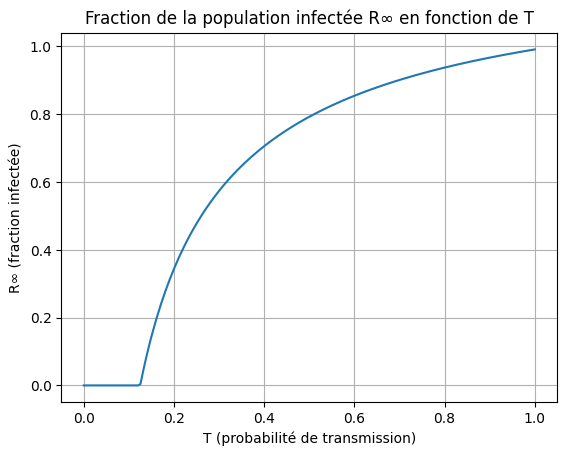

In [161]:
import numpy as np
import matplotlib.pyplot as plt

# Constante kappa donnée
kappa = 5

# Fonction u(T) pour T > 0.125
def u_plus(T):
    return (2*T**2 + T - 2*np.sqrt((T+1)*T**3)) / (4*T**2)

# Valeurs de T entre 0 et 1
T = np.linspace(1e-6, 1, 200)

u = np.where(T <= 0.125, 1, u_plus(T))

# Calcul de R_inf
R_inf = 1 - (1 - T*(1-u)) / (1 + T*(kappa-1)*(1-u))

# Tracé
plt.plot(T, R_inf)
plt.xlabel('T (probabilité de transmission)')
plt.ylabel('R∞ (fraction infectée)')
plt.title('Fraction de la population infectée R∞ en fonction de T')
plt.grid(True)
plt.show()

Dans le cadre du modèle SIR sur réseau étudié, il existe une probabilité critique $p_c$ appelée seuil épidémique [1]. Cette probabilité marque une transition de comportement dans la dynamique de propagation d'une maladie.

Lorsque la taille du réseau (le nombre d'individus $N$) tend vers l'infini, on observe que la fraction de la population infectée $R_{\infty}$ (donné par l'équation plus haut) reste nulle si $p<p_c$, indiquant que l'infection ne se propage pas à grande échelle. En revanche, si $p>p_c$, $R_{\infty}$ devient fini et significatif, ce qui représente l'apparition d'une véritable épidémie. Cette transition s'apparente à une transition de phase en physique, similaire à ce qui est observé en percolation : sous le seuil critique, la maladie ne touche qu'une fraction négligeable de la population, alors qu'au-dessus du seuil, elle se répand massivement. Dans notre modèle particulier, cette probabilité critique $p_c$ dépend des propriétés locales du réseau, notamment du degré moyen $\kappa$ des nœuds. On observe que pour $T \leq 0.125126$, aucune épidémie ne peut survenir (pas de solution réelle pour la propagation), tandis que pour $T>0.125126$, une épidémie devient possible et $R_{\infty}$ croît rapidement avec $T$, pour se stabiliser autour de 1 avec une tendance logarithmique..

### d. Résolvez numériquement l’équation à l’aide d’implémentations personnelles de la méthode par relaxation et de la méthode de Newton-Raphson pour 20 valeurs de T uniformément distribuées dans l’intervalle [0, 1].

On va d'abord définit les solutions analytiques de l'équation.

In [162]:
import numpy as np

def u_analytique(T):
    u = np.zeros_like(T)
    seuil = 0.125
    mask = T <= seuil
    u[mask] = 1
    u[~mask] = (2*T[~mask]**2 + T[~mask] - 2*np.sqrt(T[~mask]**3 * (T[~mask] + 1))) / (4*T[~mask]**2)
    return u

Tvals = np.linspace(1e-6, 1, 20)
u1 = np.ones(20)
u2 = (2*Tvals**2 + Tvals + 2*np.sqrt((Tvals+1)*Tvals**3)) / (4*Tvals**2)
u3 = (2*Tvals**2 + Tvals - 2*np.sqrt((Tvals+1)*Tvals**3)) / (4*Tvals**2)

On définit par la suite la fonction $f(u)$ ainsi que les fonctions qui en découlent pour la méthode de Newton-Raphson

In [163]:
def f(u, T, kappa=5):
    return 1 / (1 + T * (kappa - 1) * (1 - u))**2

def g(u, T, kappa=5):
    return u - 1 / (1 + T*(kappa-1)*(1-u))**2

def g_prime(u, T, kappa=5):
    return 1 - 2*T*(kappa-1) / (1 + T*(kappa-1)*(1-u))**3

On implémente la méthode de relaxation pour résoudre numériquement l'équation. On utilise plusieurs valeurs initiales pour trouver toutes les solutions possibles, en s'assurant de rejeter les doublons.

In [164]:
def relaxation_multi(T, u0_list, tol=1e-10, max_iter=1000, kappa=5):
    solutions = []
    for u0 in u0_list:
        u = u0
        for _ in range(max_iter):
            u_new = f(u, T, kappa)
            if abs(u_new - u) < tol:
                break
            u = u_new
        # Vérifier si la solution est unique
        if not any(np.isclose(u, sol, atol=1e-6) for sol in solutions):
            solutions.append(u)
    return solutions

On implémente la méthode de Newton-Raphson pour résoudre numériquement l'équation. On utilise plusieurs valeurs initiales pour trouver toutes les solutions possibles, en s'assurant de rejeter les doublons.

In [165]:
def newton_multi(T, u0_list, tol=1e-10, max_iter=1000, kappa=5):
    solutions = []
    for u0 in u0_list:
        u = u0
        for _ in range(max_iter):
            derivative = g_prime(u, T, kappa)
            if derivative == 0:
                break
            u_new = u - g(u, T, kappa) / derivative
            if abs(u_new - u) < tol:
                break
            u = u_new
        # Vérifier si la solution est unique
        if not any(np.isclose(u, sol, atol=1e-6) for sol in solutions):
            solutions.append(u)
    return solutions

Le code utilise *de facto* différentes valeurs initiales de l'algorithme de manière à converger sur toutes les solutions. On représente ainsi par graphique toutes les solutions trouvées par les implémentations de résolution numérique.

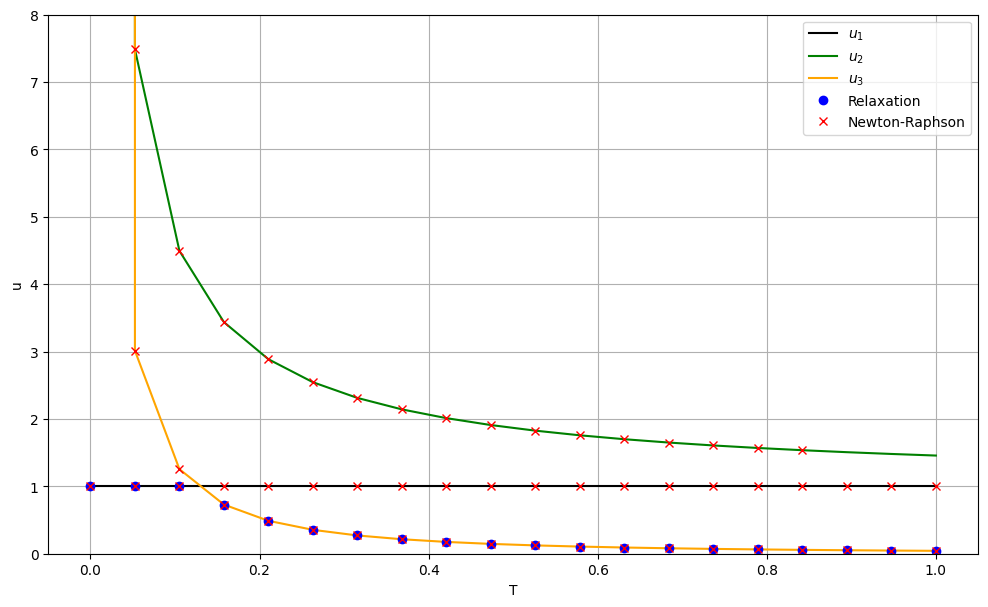

In [166]:
import numpy as np
import matplotlib.pyplot as plt

# Crée une figure pour le tracé
plt.figure(figsize=(12, 7))

# Solutions avec relaxation et Newton-Raphson
u0_list = np.linspace(-0.5, 10, 20)

relax_roots = []
newton_roots = []

for T in Tvals:
    relax_roots.append(relaxation_multi(T, u0_list))
    newton_roots.append(newton_multi(T, u0_list))

#Solutions analytiques
plt.plot(Tvals, u1, label='$u_1$', color='black')
plt.plot(Tvals, u2, label='$u_2$', color='green')
plt.plot(Tvals, u3, label='$u_3$', color='orange')

# graph Relaxation
for i, T in enumerate(Tvals):
    plt.plot([T]*len(relax_roots[i]), relax_roots[i], 'bo', label='Relaxation' if i == 0 else "")

# graph Newton-Raphson
for i, T in enumerate(Tvals):
    plt.plot([T]*len(newton_roots[i]), newton_roots[i], 'rx', label='Newton-Raphson' if i == 0 else "")

plt.xlabel('T')
plt.ylabel('u')
plt.legend()
plt.grid()
plt.ylim(0, 8)
plt.show()

On remarque que seul la méthode de Newton-Raphson converge vers les 3 solutions analytiques. Effectivement, la méthode de relaxation ne permet d'obtenir qu'une seule solution.
On sait que selon le manuel du cours, la méthode de relaxation ne converge vers une vraie racine que si la dérivée de la fonction est inférieure à un lorsque évaluée à cette racine. On peut donc, comme recommandé dans la question, tracer la dérivée en fonction en fonction de u pour plusieurs valeurs de T pour s'en convaincre.

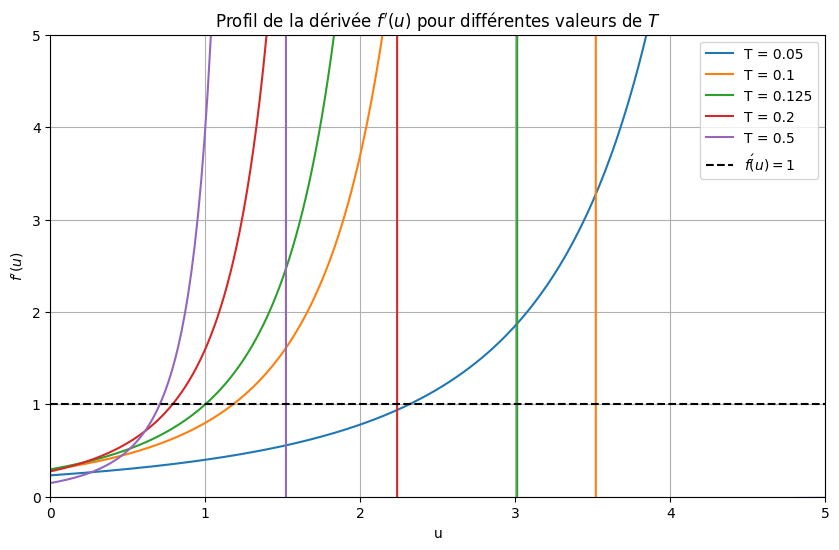

In [167]:
def df(u, T, kappa=5):
    return 2 * T * (kappa - 1) / (1 + T * (kappa - 1) * (1 - u))**3

# Valeurs de u
u_vals = np.linspace(-0.5, 10, 500)

# Quelques valeurs de T à tracer
T_list = [0.05, 0.1, 0.125, 0.2, 0.5]

# Tracer
plt.figure(figsize=(10, 6))
for T in T_list:
    plt.plot(u_vals, df(u_vals, T), label=f'T = {T}')

plt.axhline(1, color='k', linestyle='--', label=r'$f\'(u) = 1$')
plt.xlabel('u')
plt.ylabel(r"$f'(u)$")
plt.title(r"Profil de la dérivée $f'(u)$ pour différentes valeurs de $T$")
plt.ylim(0, 5)
plt.xlim(0, 5)
plt.grid()
plt.legend()
plt.show()

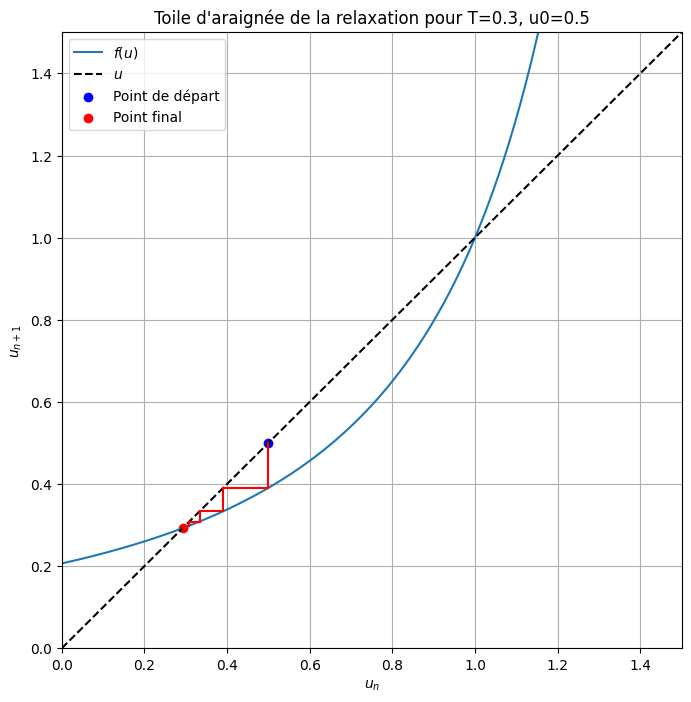

In [168]:
def cobweb_plot(T, u0, n_iterations=20, kappa=5):
    u_vals = np.linspace(0, 1.5, 500)
    f_vals = f(u_vals, T, kappa)
    
    # Initialiser la figure
    plt.figure(figsize=(8,8))
    plt.plot(u_vals, f_vals, label=r'$f(u)$')
    plt.plot(u_vals, u_vals, 'k--', label=r'$u$')
    plt.xlim(0, 1.5)
    plt.ylim(0, 1.5)
    plt.xlabel(r'$u_n$')
    plt.ylabel(r'$u_{n+1}$')
    plt.title(f'Toile d\'araignée de la relaxation pour T={T}, u0={u0}')
    plt.legend()
    plt.grid()
    
    # Départ
    u = u0
    for _ in range(n_iterations):
        u_new = f(u, T, kappa)
        # Ligne horizontale
        plt.plot([u, u], [u, u_new], 'r')
        # Ligne verticale
        plt.plot([u, u_new], [u_new, u_new], 'r')
        u = u_new  # Mise à jour pour l'itération suivante
    plt.scatter(u0, u0, color='blue', label='Point de départ')
    plt.scatter(u, u_new, color='red', label='Point final')
    plt.legend()
    plt.show()
cobweb_plot(T=0.3, u0=0.5, n_iterations=20)

On peut aussi analyser la convergence de la méthode de Raphson-Newton avec un diagramme toile d'araignée. 

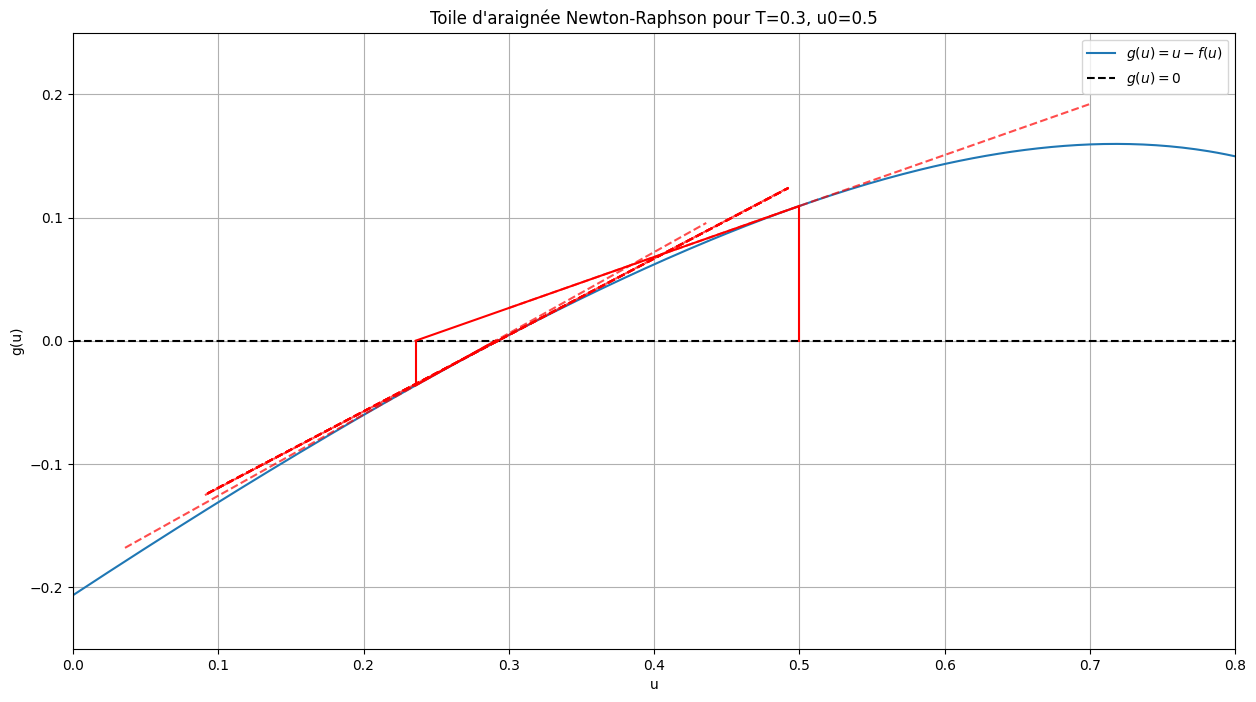

In [169]:
def newton_cobweb_plot(T, u0, n_iterations=10, kappa=5):
    u_vals = np.linspace(0, 1.5, 500)
    g_vals = g(u_vals, T, kappa)
    
    # Initialiser la figure
    plt.figure(figsize=(15,8))
    plt.plot(u_vals, g_vals, label=r'$g(u) = u - f(u)$')
    plt.axhline(0, color='k', linestyle='--', label=r'$g(u)=0$')
    plt.xlim(0, 0.8)
    plt.ylim(-0.25, 0.25)
    plt.xlabel('u')
    plt.ylabel('g(u)')
    plt.title(f'Toile d\'araignée Newton-Raphson pour T={T}, u0={u0}')
    plt.grid()
    
    # Départ
    u = u0
    for _ in range(n_iterations):
        slope = g_prime(u, T, kappa)
        intercept = g(u, T, kappa) - slope * u
        
        # Ligne tangente à g(u) au point courant
        u_line = np.linspace(u-0.2, u+0.2, 10)
        g_line = slope * u_line + intercept
        plt.plot(u_line, g_line, 'r--', alpha=0.7)

        # Mise à jour Newton
        u_new = u - g(u, T, kappa) / slope

        # Ligne horizontale entre u et u_new
        plt.plot([u, u], [0, g(u, T, kappa)], 'r')
        plt.plot([u, u_new], [g(u, T, kappa), 0], 'r')
        
        u = u_new  # Mise à jour
    
    plt.legend()
    plt.show()
newton_cobweb_plot(T=0.3, u0=0.5, n_iterations=10)

On remarque que la méthode de convergence est différente de celle de la méthode de relaxation. La méthode toile d'araignée a d'ailleurs dû être adaptée pour la faire fonctionner avec cette méthode. La méthode de convergence de Newton-Raphson permet de trouver les différentes solutions plus efficacement, ce qu'on voit par sa capacité à donner les 3 solutions analytiques.

##### Références:
[1] MOH A. AITOUCHE et al. *Modélisation mathématique de propagation d'une epidemie*,  Université M'Hamed Bougara de Boumerdès, Alger. 2022. URL= https://fhc.univ-boumerdes.dz/wp-content/uploads/2020/04/Mod%C3%A9lisation-math%C3%A9matique-de-propagation-dune-%C3%A9pid%C3%A9mie.pdf 